## **Title-26: Renewable Energy Usage Analysis**

### **Objective:**  
Analyze the adoption of renewable energy sources across regions.

### **Dataset:**  
`renewable_energy.csv`  
Columns:  
`region, year, solar_kwh, wind_kwh, hydro_kwh, total_consumption`


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [35]:
try:
    df = pd.read_csv('renewable_energy.csv')
    print("File loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: 'renewable_energy.csv' not found. Please upload the file to your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


,region,year,solar_kwh,wind_kwh,hydro_kwh,total_consumption
0,North,2020,1500,1200,800,5000
1,South,2020,1300,1000,950,4800
2,East,2020,900,700,600,4200
3,West,2020,1100,950,850,4500
4,North,2021,1600,1300,900,5200


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['solar_kwh'].plot(kind='hist', bins=20, title='solar_kwh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['wind_kwh'].plot(kind='hist', bins=20, title='wind_kwh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['hydro_kwh'].plot(kind='hist', bins=20, title='hydro_kwh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='year', y='solar_kwh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='solar_kwh', y='wind_kwh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='wind_kwh', y='hydro_kwh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='hydro_kwh', y='total_consumption', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['solar_kwh']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('solar_kwh')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['wind_kwh']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('wind_kwh')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['hydro_kwh']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('hydro_kwh')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['total_consumption']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('region')):
  _plot_series(series, series_name, i)
  fig.legend(title='region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('total_consumption')

from matplotlib import pyplot as plt
_df_13['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['solar_kwh'].plot(kind='line', figsize=(8, 4), title='solar_kwh')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['wind_kwh'].plot(kind='line', figsize=(8, 4), title='wind_kwh')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['hydro_kwh'].plot(kind='line', figsize=(8, 4), title='hydro_kwh')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='year', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='solar_kwh', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='wind_kwh', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='hydro_kwh', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### **Handle Missing Renewable Values (Forward Fill)**

In [37]:
df[['solar_kwh', 'wind_kwh', 'hydro_kwh']] = df[['solar_kwh', 'wind_kwh', 'hydro_kwh']].ffill()

print("Missing values in solar_kwh, wind_kwh, and hydro_kwh handled using forward fill.")

Missing values in solar_kwh, wind_kwh, and hydro_kwh handled using forward fill.


## **Q1: Calculate total renewable contribution by region. [CO1, BL3]**

In [38]:
df['total_renewable'] = df['solar_kwh'] + df['wind_kwh'] + df['hydro_kwh']
region_contribution = df.groupby('region')['total_renewable'].sum().reset_index()
print(region_contribution)



  region  total_renewable
0   East             4520
1  North             7300
2  South             6670
3   West             5970


## **Q2: Compare solar vs wind usage across years. [CO2, BL4]**

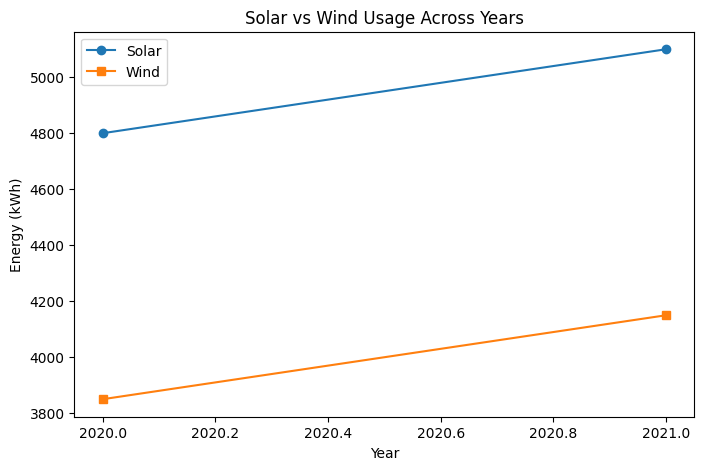

In [26]:
solar_wind = df.groupby('year')[['solar_kwh', 'wind_kwh']].sum().reset_index()
plt.figure(figsize=(8,5))
plt.plot(solar_wind['year'], solar_wind['solar_kwh'], marker='o', label='Solar')
plt.plot(solar_wind['year'], solar_wind['wind_kwh'], marker='s', label='Wind')
plt.xlabel('Year')
plt.ylabel('Energy (kWh)')
plt.title('Solar vs Wind Usage Across Years')
plt.legend()
plt.show()

## **Q3: Impute missing hydro_kwh with mean. [CO3, BL3]**

In [32]:
df.fillna({'hydro_kwh': df['hydro_kwh'].mean()}, inplace=True)

print('Missing values handled successfully.')

Missing values handled successfully.


## **Q4: Analyze correlation between renewable usage and total_consumption. [CO4, BL4]**

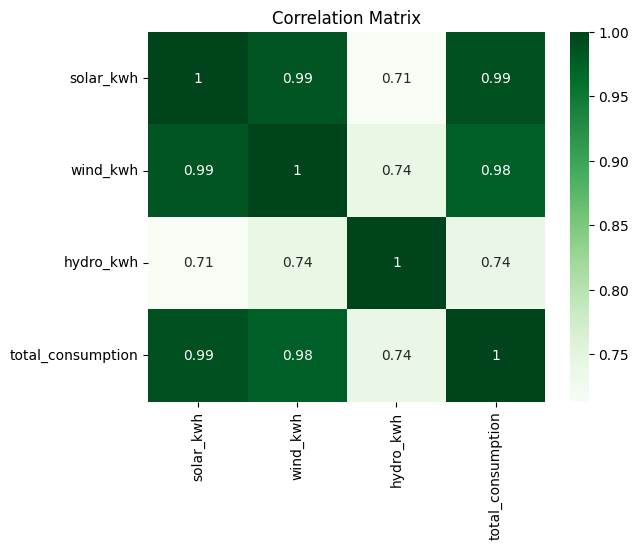

In [33]:
corr = df[['solar_kwh', 'wind_kwh', 'hydro_kwh', 'total_consumption']].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

## **Q5: Create stacked bar plots and trend lines. [CO5, BL5]**

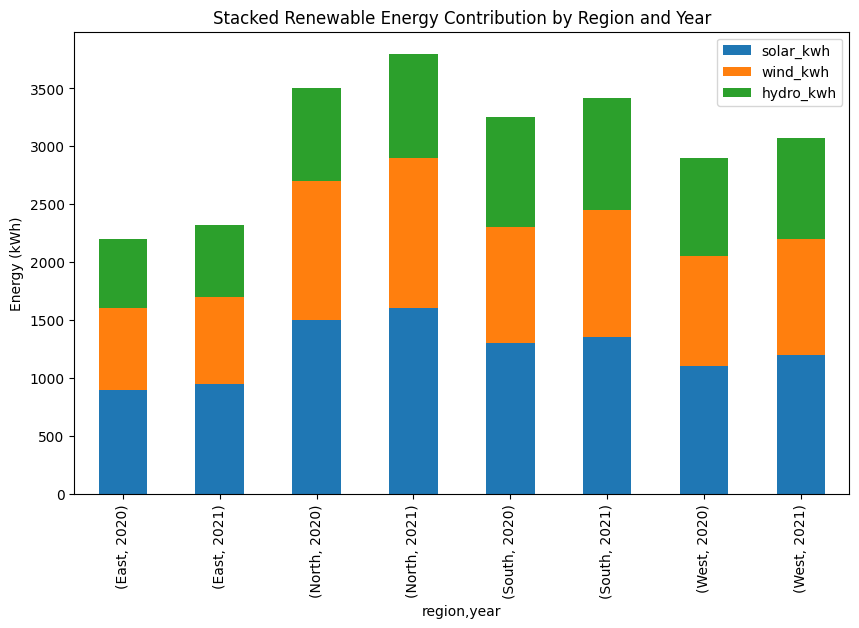

/tmp/ipython-input-898185412.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='total_renewable', data=df, estimator='sum', ci=None)


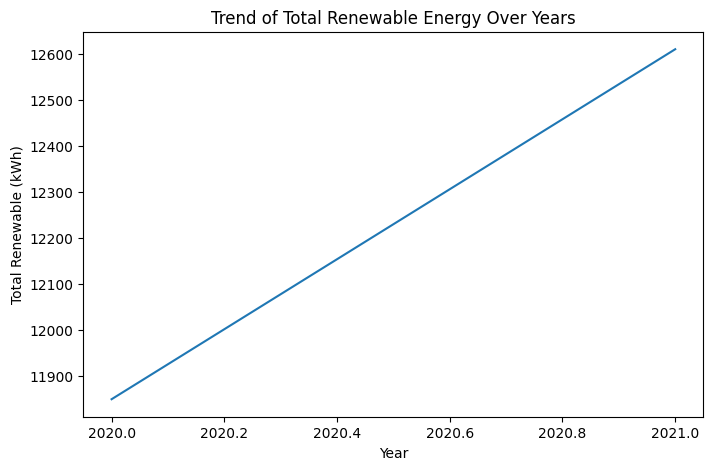

In [34]:
region_year = df.groupby(['region', 'year'])[['solar_kwh', 'wind_kwh', 'hydro_kwh']].sum().reset_index()
region_year.set_index(['region', 'year'], inplace=True)
region_year.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Renewable Energy Contribution by Region and Year')
plt.ylabel('Energy (kWh)')
plt.show()

# Trend line for total renewable
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='total_renewable', data=df, estimator='sum', ci=None)
plt.title('Trend of Total Renewable Energy Over Years')
plt.xlabel('Year')
plt.ylabel('Total Renewable (kWh)')
plt.show()